# 3_1.확률분포

## 1.기본 package 설치

In [1]:
## 1.기본
import numpy as np  # numpy 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기
import seaborn as sns # 시각화

## 2.데이터 가져오기
import pandas as pd # csv -> dataframe으로 전환

## 3.확률분포
from scipy import stats
from scipy.stats import binom # 이항분포
from scipy.stats import poisson # 포아송분포
from scipy.stats import expon # 지수분포
from scipy.stats import norm # 정규분포

## 2.이항분포
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html


In [2]:
# 이항분포 확률값구하기
# 성공률 40%일때, 3명의 손님이 앉은 테이블에서 3명이 모두 못 받을 확률은?
n = 3   # 시행횟수
p = 0.4  # 성공확률
x = 0  # 성공횟수
binom.pmf(k = x, n = n, p = p).round(3)

0.216

In [3]:
# 이항확률분포 확률분포표
# 성공률 70%일때
n = 10   # 시행횟수
p = 0.7  # 성공확률
x = [0,1,2,3,4,5,6,7,8,9,10] # 성공횟수
results = binom.pmf(x, n = n, p = p).round(3)
results1 = binom.cdf(x, n = n, p = p).round(3)

binom_df = pd.DataFrame({'x': x, 'pmf': results, 'cdf': results1})
binom_df

,x,pmf,cdf
0,0,0.000,0.000
1,1,0.000,0.000
2,2,0.001,0.002
3,3,0.009,0.011
4,4,0.037,0.047
5,5,0.103,0.150
6,6,0.200,0.350
7,7,0.267,0.617
8,8,0.233,0.851
9,9,0.121,0.972


In [4]:
# 이항분포 누적 확률값 구하기
# 성공률 70%일때, 7명이하 받을 확률
n = 10   # 시행횟수
p = 0.7  # 성공확률
x = 7    # 성공횟수
binom.cdf(k = x, n = n, p = p).round(3)

0.617

In [5]:
# 이항분포 누적 확률값 구하기
# 성공률 70%일때, 7명이상 받을 확률
n = 10   # 시행횟수
p = 0.7  # 성공확률
x = 6    # 성공횟수
1- binom.cdf(k = x, n = n, p = p).round(3)

0.65

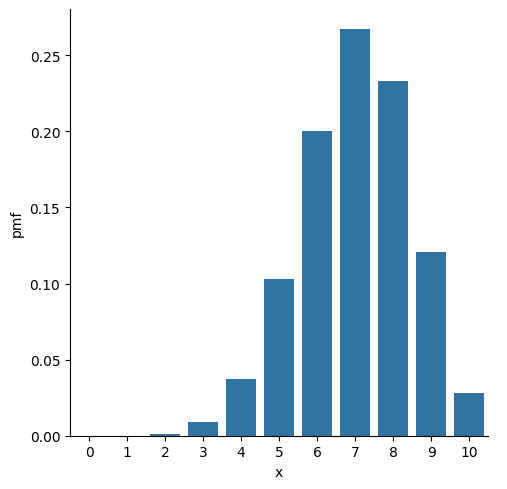

In [6]:
# seaborn
sns.catplot(x = "x",
            y = "pmf",
            kind = "bar",
            data = binom_df)
plt.show()

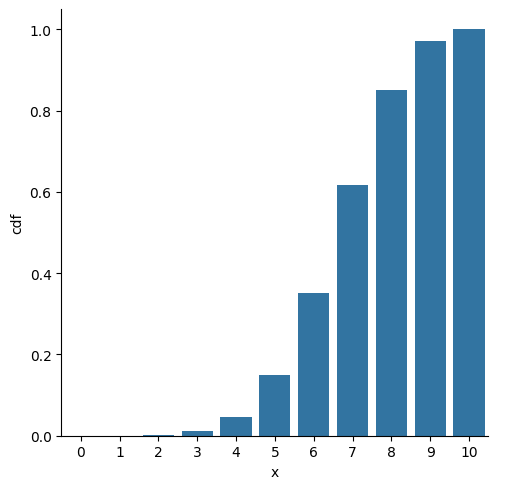

In [7]:
# seaborn
sns.catplot(x = "x",
            y = "cdf",
            kind = "bar",
            data = binom_df)
plt.show()

## 3.포아송분포

In [8]:
# 포아송분포 확률값구하기
# G서비스 센터는 10분에 평균 1회의 전화가 온다. 10분 동안에 2회의 전화를 받을 확률은?
lamb = 1   # 평균발생건수
x = 2      # 발생건수
poisson.pmf(k = x, mu = lamb).round(3)

0.184

In [9]:
# 포아송분포 확률분포표
# G서비스 센터는 10분에 평균 1회의 전화가 온다.
lamb = 1   # 평균발생건수
x = [0,1,2,3,4,5,6,7,8,9,10] # 발생건수
results = poisson.pmf(x, mu = lamb).round(3)
results1 = poisson.cdf(x, mu = lamb).round(3)

poisson_df = pd.DataFrame({'x': x, 'pmf': results, 'cdf': results1})
poisson_df

,x,pmf,cdf
0,0,0.368,0.368
1,1,0.368,0.736
2,2,0.184,0.920
3,3,0.061,0.981
4,4,0.015,0.996
5,5,0.003,0.999
6,6,0.001,1.000
7,7,0.000,1.000
8,8,0.000,1.000
9,9,0.000,1.000


In [10]:
# 포아송분포 누적 확률값구하기
# 2회 이상 전화 받을 확률은
lamb = 1   # 평균발생건수
x = 1      # 발생건수
1- poisson.cdf(k = x, mu = lamb).round(3)

0.264

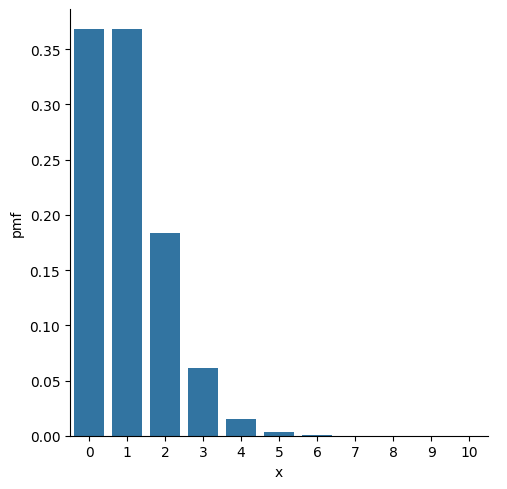

In [11]:
# seaborn
sns.catplot(x = "x",
            y = "pmf",
            kind = "bar",
            data = poisson_df)
plt.show()

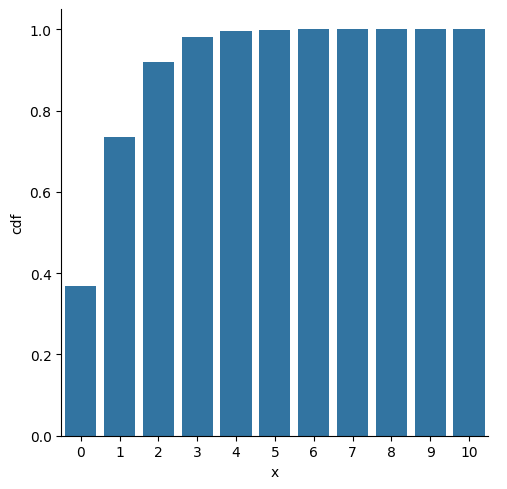

In [12]:
# seaborn
sns.catplot(x = "x",
            y = "cdf",
            kind = "bar",
            data = poisson_df)
plt.show()

## 4.지수분포
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

In [13]:
# 지수분포 확률값구하기
# G서비스 센터는 10분에 평균 1회의 전화가 온다. 대기시간이 2분 이내일 확률은?
lamb = 2         # 평균발생건수
scale = 1/lamb   # 평균대기시간
time = 10        # 기준시간
queue = 2        # 대기시간
x = queue/time   # 대기시간비율
expon.cdf(scale = scale, x = x).round(3)

0.33

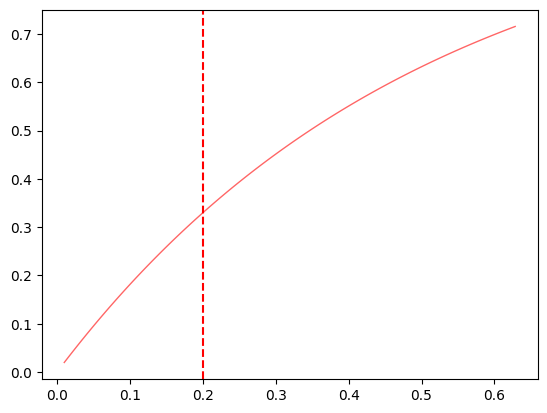

In [14]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(expon.cdf(0.01), expon.cdf(0.99), 100)
ax.plot(x, expon.cdf(x, scale = 1/lamb), 'r-', lw=1, alpha=0.6)
plt.axvline(x = 0.2, color='r', linestyle='--')
plt.show()

## 5.정규분포

In [15]:
# 정규분포 확률값구하기
# G대학 경영통계 수업 듣는 학생의 시험점수가 평균 50, 표준편차가 20점이라고 한다.
# 60점을 받았다면 상위 몇 %인가?

mu = 50 # 평균
std = 20 # 표준편차
x = 60
1-norm.cdf(x, loc = mu, scale = std).round(3)

0.30900000000000005

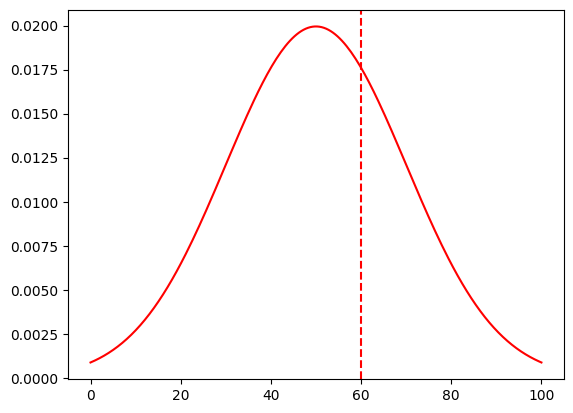

In [16]:
x_data = np.linspace(0, 100, 200)
mu = 50 # 평균
std = 20 # 표준편차
plt.plot(x_data, norm.pdf(x_data, loc = mu, scale = std), 'r-')
plt.axvline(x = 60, color='r', linestyle='--')
plt.show()

In [17]:
# 정규분포 확률값구하기
# 상위 35%에 들기 위한 점수는?

mu = 50 # 평균
std = 20 # 표준편차
q = 0.65
norm.ppf(q, loc = mu, scale = std).round(3)

57.706

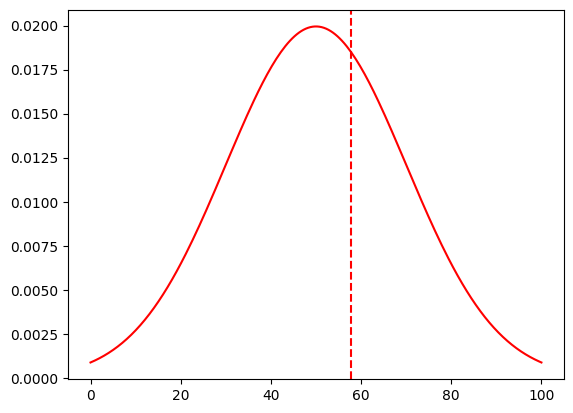

In [18]:
x_data = np.linspace(0, 100, 200)
mu = 50 # 평균
std = 20 # 표준편차
plt.plot(x_data, norm.pdf(x_data, loc = mu, scale = std), 'r-')
plt.axvline(x = 57.706, color='r', linestyle='--')
plt.show()